In [187]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Dense, GRU, Conv1D, MaxPooling1D, Flatten

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EXECUTIVE TWEETS DATA

In [189]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/Reddit/EXEC_FINBERT_Reddit_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)
#stock_data = stock_data[(stock_data['Date'] >= '2018-07-27')]
# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,43.397999,NaN,NaN,NaN,42.972000,44.066002,42.192001,29616500
2017-01-04,45.397999,NaN,NaN,NaN,42.950001,45.599998,42.862000,56067500
2017-01-05,45.349998,NaN,NaN,NaN,45.284000,45.495998,44.389999,29558500
2017-01-06,45.801998,NaN,NaN,NaN,45.386002,46.062000,45.090000,27639500
2017-01-09,46.256001,NaN,NaN,NaN,45.793999,46.383999,45.599998,19897500
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,0.094719,0.016290,0.888990,860.770020,906.359985,848.030029,25260500
2022-05-03,909.250000,0.160966,0.011242,0.827792,903.179993,924.080017,888.590027,21236500
2022-05-04,952.619995,NaN,NaN,NaN,903.940002,955.500000,885.280029,27214600


In [190]:
stock_data.shape

(1346, 8)

In [191]:
stock_data.isna().sum()

Close         0
negative    854
neutral     854
positive    854
Open          0
High          0
Low           0
Volume        0
dtype: int64

In [192]:
stock_data['negative'] = stock_data['negative'].interpolate(option='spline')
stock_data['positive'] = stock_data['positive'].interpolate(option='spline')
stock_data['neutral'] = stock_data['neutral'].interpolate(option='spline')
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,43.397999,NaN,NaN,NaN,42.972000,44.066002,42.192001,29616500
2017-01-04,45.397999,NaN,NaN,NaN,42.950001,45.599998,42.862000,56067500
2017-01-05,45.349998,NaN,NaN,NaN,45.284000,45.495998,44.389999,29558500
2017-01-06,45.801998,NaN,NaN,NaN,45.386002,46.062000,45.090000,27639500
2017-01-09,46.256001,NaN,NaN,NaN,45.793999,46.383999,45.599998,19897500
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,0.094719,0.016290,0.888990,860.770020,906.359985,848.030029,25260500
2022-05-03,909.250000,0.160966,0.011242,0.827792,903.179993,924.080017,888.590027,21236500
2022-05-04,952.619995,0.135759,0.087663,0.776579,903.940002,955.500000,885.280029,27214600


In [193]:
stock_data.isna().sum()

Close         0
negative    394
neutral     394
positive    394
Open          0
High          0
Low           0
Volume        0
dtype: int64

In [194]:
stock_data = stock_data.dropna()
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2018-07-27,59.436001,0.029995,0.257046,0.712959,61.450001,61.537998,59.068001,28516500
2018-07-30,58.034000,0.056388,0.248041,0.695571,59.180000,59.220001,57.226002,34070500
2018-07-31,59.627998,0.082781,0.239036,0.678184,58.450001,59.664001,57.813999,25384500
2018-08-01,60.167999,0.109174,0.230031,0.660796,59.598000,60.599998,58.599998,50647000
2018-08-02,69.907997,0.135566,0.221026,0.643408,65.688004,69.998001,64.632004,116075000
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,0.094719,0.016290,0.888990,860.770020,906.359985,848.030029,25260500
2022-05-03,909.250000,0.160966,0.011242,0.827792,903.179993,924.080017,888.590027,21236500
2022-05-04,952.619995,0.135759,0.087663,0.776579,903.940002,955.500000,885.280029,27214600


In [195]:
stock_data.isna().any()

Close       False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [196]:
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2018-07-27,59.436001,0.029995,0.257046,0.712959,61.450001,61.537998,59.068001,28516500
2018-07-30,58.034000,0.056388,0.248041,0.695571,59.180000,59.220001,57.226002,34070500
2018-07-31,59.627998,0.082781,0.239036,0.678184,58.450001,59.664001,57.813999,25384500
2018-08-01,60.167999,0.109174,0.230031,0.660796,59.598000,60.599998,58.599998,50647000
2018-08-02,69.907997,0.135566,0.221026,0.643408,65.688004,69.998001,64.632004,116075000
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,0.094719,0.016290,0.888990,860.770020,906.359985,848.030029,25260500
2022-05-03,909.250000,0.160966,0.011242,0.827792,903.179993,924.080017,888.590027,21236500
2022-05-04,952.619995,0.135759,0.087663,0.776579,903.940002,955.500000,885.280029,27214600


In [197]:
stock_data.describe(include='all')

,Close,negative,neutral,positive,Open,High,Low,Volume
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02
mean,391.771953,0.143632,0.166172,0.690196,391.815963,400.847062,381.974996,4.736848e+07
std,358.566745,0.132716,0.171592,0.181894,358.984147,367.100211,349.749412,3.268678e+07
min,35.793999,0.007546,0.007794,0.019731,36.220001,37.335999,35.397999,9.800600e+06
25%,62.536501,0.054322,0.038663,0.591915,62.559502,63.628500,60.730000,2.561765e+07
50%,197.687996,0.099043,0.101234,0.711216,198.208000,201.388000,191.725998,3.628290e+07
75%,701.852493,0.191493,0.242579,0.832508,701.130005,715.189987,684.775009,5.895762e+07
max,1229.910034,0.931979,0.969577,0.952814,1234.410034,1243.489990,1217.000000,3.046940e+08


In [198]:
stock_data= stock_data.astype({"Volume":'float'})

In [199]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 2018-07-27 to 2022-05-06
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     952 non-null    float64
 1   negative  952 non-null    float64
 2   neutral   952 non-null    float64
 3   positive  952 non-null    float64
 4   Open      952 non-null    float64
 5   High      952 non-null    float64
 6   Low       952 non-null    float64
 7   Volume    952 non-null    float64
dtypes: float64(8)
memory usage: 66.9+ KB


In [200]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 760
Number of records in Test Data: 192


In [201]:
stock_data['Close_EWMA3'] = stock_data['Close'].ewm(span=3, adjust=False).mean()
stock_data['Close_EWMA7'] = stock_data['Close'].ewm(span=7, adjust=False).mean()
stock_data['Close_EWMA14'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data['Close_EWMA30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data['pos_EWMA3'] = stock_data['positive'].ewm(span=3, adjust=False).mean()
stock_data['pos_EWMA7'] = stock_data['positive'].ewm(span=7, adjust=False).mean()
stock_data['pos_EWMA14'] = stock_data['positive'].ewm(span=14, adjust=False).mean()
stock_data['pos_EWMA30'] = stock_data['positive'].ewm(span=30, adjust=False).mean()

stock_data['neu_EWMA3'] = stock_data['neutral'].ewm(span=3, adjust=False).mean()
stock_data['neu_EWMA7'] = stock_data['neutral'].ewm(span=7, adjust=False).mean()
stock_data['neu_EWMA14'] = stock_data['neutral'].ewm(span=14, adjust=False).mean()
stock_data['neu_EWMA30'] = stock_data['neutral'].ewm(span=30, adjust=False).mean()

stock_data['neg_EWMA3'] = stock_data['negative'].ewm(span=3, adjust=False).mean()
stock_data['neg_EWMA7'] = stock_data['negative'].ewm(span=7, adjust=False).mean()
stock_data['neg_EWMA14'] = stock_data['negative'].ewm(span=14, adjust=False).mean()
stock_data['neg_EWMA30'] = stock_data['negative'].ewm(span=30, adjust=False).mean()


# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

negative = stock_data.iloc[start:total_data,1] #neg
neutral = stock_data.iloc[start:total_data,2] #neu
positive = stock_data.iloc[start:total_data,3] #pos
open_price = stock_data.iloc[start:total_data,4] #open
high = stock_data.iloc[start:total_data,5] #high
low = stock_data.iloc[start:total_data,6] #low
volume = stock_data.iloc[start:total_data,7] #volume

ewma3_close = stock_data.iloc[start:total_data,8]#exponentially moving average 3days
ewma7_close = stock_data.iloc[start:total_data,9]#exponentially moving average 7days
ewma14_close = stock_data.iloc[start:total_data,10]#exponentially moving average 14days
ewma30_close = stock_data.iloc[start:total_data,11]#exponentially moving average 30days

ewma3_pos = stock_data.iloc[start:total_data,12]#exponentially moving average 3days
ewma7_pos = stock_data.iloc[start:total_data,13]#exponentially moving average 7days
ewma14_pos = stock_data.iloc[start:total_data,14]#exponentially moving average 14days
ewma30_pos = stock_data.iloc[start:total_data,15]#exponentially moving average 30days

ewma3_neu = stock_data.iloc[start:total_data,16]#exponentially moving average 3days
ewma7_neu = stock_data.iloc[start:total_data,17]#exponentially moving average 7days
ewma14_neu = stock_data.iloc[start:total_data,18]#exponentially moving average 14days
ewma30_neu = stock_data.iloc[start:total_data,19]#exponentially moving average 30days

ewma3_neg = stock_data.iloc[start:total_data,20]#exponentially moving average 3days
ewma7_neg = stock_data.iloc[start:total_data,21]#exponentially moving average 7days
ewma14_neg = stock_data.iloc[start:total_data,22]#exponentially moving average 14days
ewma30_neg = stock_data.iloc[start:total_data,23]#exponentially moving average 30days

In [202]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2018-07-30     58.034000
2018-07-31     59.627998
2018-08-01     60.167999
2018-08-02     69.907997
2018-08-03     69.634003
                 ...    
2022-05-02    902.940002
2022-05-03    909.250000
2022-05-04    952.619995
2022-05-05    873.280029
2022-05-06    865.650024
Name: Close, Length: 951, dtype: float64

In [203]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price,
                  ewma3_close,
                  ewma7_close,
                  ewma14_close,
                  ewma30_close, 
                  close_price_shifted, 

                  positive,
                  ewma3_pos,
                  ewma7_pos,
                  ewma14_pos,
                  ewma30_pos, 

                  negative,
                  ewma3_neg,
                  ewma7_neg,
                  ewma14_neg,
                  ewma30_neg,

                  neutral,
                  ewma3_neu,
                  ewma7_neu,
                  ewma14_neu,
                  ewma30_neu, 

                  volume, 
                  open_price, 
                  high, 
                  low], 
                 axis=1)
data.columns = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-30,58.034000,58.735001,59.085501,59.249067,59.345549,59.627998,0.695571,0.704265,0.708612,0.710641,...,0.031698,0.248041,0.252543,0.254794,0.255845,0.256465,34070500.0,59.180000,59.220001,57.226002
2018-07-31,59.627998,59.181499,59.221125,59.299592,59.363772,60.167999,0.678184,0.691224,0.701005,0.706313,...,0.034994,0.239036,0.245789,0.250855,0.253604,0.255340,25384500.0,58.450001,59.664001,57.813999
2018-08-01,60.167999,59.674749,59.457844,59.415379,59.415657,69.907997,0.660796,0.676010,0.690953,0.700244,...,0.039780,0.230031,0.237910,0.245649,0.250461,0.253707,50647000.0,59.598000,60.599998,58.599998
2018-08-02,69.907997,64.791373,62.070382,60.814395,60.092583,69.634003,0.643408,0.659709,0.679067,0.692666,...,0.045959,0.221026,0.229468,0.239493,0.246536,0.251599,116075000.0,65.688004,69.998001,64.632004
2018-08-03,69.634003,67.212688,63.961287,61.990343,60.708158,68.398003,0.626020,0.642865,0.665805,0.683780,...,0.053443,0.212021,0.220744,0.232625,0.241934,0.249045,68282500.0,69.561996,71.000000,68.505997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.888990,0.843119,0.814355,0.781769,...,0.128200,0.016290,0.064124,0.093651,0.111239,0.108288,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.827792,0.835455,0.817714,0.787905,...,0.130314,0.011242,0.037683,0.073049,0.097906,0.102027,21236500.0,903.179993,924.080017,888.590027
2022-05-04,952.619995,926.774510,922.223103,941.692339,957.781968,873.280029,0.776579,0.806017,0.807430,0.786395,...,0.130666,0.087663,0.062673,0.076702,0.096541,0.101100,27214600.0,903.940002,955.500000,885.280029


In [204]:
data = data.dropna()    
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-30,58.034000,58.735001,59.085501,59.249067,59.345549,59.627998,0.695571,0.704265,0.708612,0.710641,...,0.031698,0.248041,0.252543,0.254794,0.255845,0.256465,34070500.0,59.180000,59.220001,57.226002
2018-07-31,59.627998,59.181499,59.221125,59.299592,59.363772,60.167999,0.678184,0.691224,0.701005,0.706313,...,0.034994,0.239036,0.245789,0.250855,0.253604,0.255340,25384500.0,58.450001,59.664001,57.813999
2018-08-01,60.167999,59.674749,59.457844,59.415379,59.415657,69.907997,0.660796,0.676010,0.690953,0.700244,...,0.039780,0.230031,0.237910,0.245649,0.250461,0.253707,50647000.0,59.598000,60.599998,58.599998
2018-08-02,69.907997,64.791373,62.070382,60.814395,60.092583,69.634003,0.643408,0.659709,0.679067,0.692666,...,0.045959,0.221026,0.229468,0.239493,0.246536,0.251599,116075000.0,65.688004,69.998001,64.632004
2018-08-03,69.634003,67.212688,63.961287,61.990343,60.708158,68.398003,0.626020,0.642865,0.665805,0.683780,...,0.053443,0.212021,0.220744,0.232625,0.241934,0.249045,68282500.0,69.561996,71.000000,68.505997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,870.760010,882.276100,916.403654,951.174978,965.548829,902.940002,0.700085,0.797248,0.789477,0.765273,...,0.130509,0.171525,0.111958,0.119438,0.125847,0.114633,29377700.0,902.250000,934.400024,870.000000
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.888990,0.843119,0.814355,0.781769,...,0.128200,0.016290,0.064124,0.093651,0.111239,0.108288,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.827792,0.835455,0.817714,0.787905,...,0.130314,0.011242,0.037683,0.073049,0.097906,0.102027,21236500.0,903.179993,924.080017,888.590027


In [205]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2018-07-30     59.627998
2018-07-31     60.167999
2018-08-01     69.907997
2018-08-02     69.634003
2018-08-03     68.398003
                 ...    
2022-04-29    902.940002
2022-05-02    909.250000
2022-05-03    952.619995
2022-05-04    873.280029
2022-05-05    865.650024
Name: close_price_shifted, Length: 950, dtype: float64

In [206]:
# setting the features dataset for prediction  
cols = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
x = data[cols]
x

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-30,58.034000,58.735001,59.085501,59.249067,59.345549,59.627998,0.695571,0.704265,0.708612,0.710641,...,0.031698,0.248041,0.252543,0.254794,0.255845,0.256465,34070500.0,59.180000,59.220001,57.226002
2018-07-31,59.627998,59.181499,59.221125,59.299592,59.363772,60.167999,0.678184,0.691224,0.701005,0.706313,...,0.034994,0.239036,0.245789,0.250855,0.253604,0.255340,25384500.0,58.450001,59.664001,57.813999
2018-08-01,60.167999,59.674749,59.457844,59.415379,59.415657,69.907997,0.660796,0.676010,0.690953,0.700244,...,0.039780,0.230031,0.237910,0.245649,0.250461,0.253707,50647000.0,59.598000,60.599998,58.599998
2018-08-02,69.907997,64.791373,62.070382,60.814395,60.092583,69.634003,0.643408,0.659709,0.679067,0.692666,...,0.045959,0.221026,0.229468,0.239493,0.246536,0.251599,116075000.0,65.688004,69.998001,64.632004
2018-08-03,69.634003,67.212688,63.961287,61.990343,60.708158,68.398003,0.626020,0.642865,0.665805,0.683780,...,0.053443,0.212021,0.220744,0.232625,0.241934,0.249045,68282500.0,69.561996,71.000000,68.505997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,870.760010,882.276100,916.403654,951.174978,965.548829,902.940002,0.700085,0.797248,0.789477,0.765273,...,0.130509,0.171525,0.111958,0.119438,0.125847,0.114633,29377700.0,902.250000,934.400024,870.000000
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.888990,0.843119,0.814355,0.781769,...,0.128200,0.016290,0.064124,0.093651,0.111239,0.108288,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.827792,0.835455,0.817714,0.787905,...,0.130314,0.011242,0.037683,0.073049,0.097906,0.102027,21236500.0,903.179993,924.080017,888.590027


In [207]:
from sklearn.preprocessing import StandardScaler
# scaling the feature dataset

scaler_x = StandardScaler ()
x = np.array(x).reshape((len(x) ,len(cols)))

# scaling the target variable
scaler_y = StandardScaler ()
y = np.array (y).reshape ((len( y), 1))

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 58.0340004 ,  58.73500061,  59.08550072, ...,  59.18000031,
          59.22000122,  57.22600174],
        [ 59.62799835,  59.18149948,  59.22112513, ...,  58.45000076,
          59.66400146,  57.81399918],
        [ 60.16799927,  59.67474937,  59.45784366, ...,  59.59799957,
          60.59999847,  58.59999847],
        ...,
        [909.25      , 900.92902549, 912.09080573, ..., 903.17999268,
         924.08001709, 888.59002686],
        [952.61999512, 926.7745103 , 922.22310307, ..., 903.94000244,
         955.5       , 885.2800293 ],
        [873.2800293 , 900.0272698 , 909.98733463, ..., 939.02001953,
         945.59997559, 857.70001221]]), array([[  59.62799835],
        [  60.16799927],
        [  69.90799713],
        [  69.63400269],
        [  68.39800262],
        [  75.91400146],
        [  74.06800079],
        [  70.48999786],
        [  71.09799957],
        [  71.28199768],
        [  69.52799988],
        [  67.73799896],
        [  67.08999634],
        [  61

In [208]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (760, 25) and y: (760, 1)
Number of rows and columns in the Test set X: (189, 25) and y: (189, 1)


In [209]:
sc = scaler_x.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

sc = scaler_y.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [210]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (760, 25, 1)
Shape of Test set X: (189, 25, 1)


# MODEL FOR EXECUTIVE TWEETS

In [211]:
# setting the seed to achieve consistent and less random predictions at each execution
import tensorflow as tf 
import random
import os
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
initializer = tf.keras.initializers.GlorotNormal()
# setting the model architecture
model2=Sequential()
model2.add((GRU(250,return_sequences=True,activation='tanh',kernel_initializer=initializer,input_shape=(len(cols),1))))
model2.add(Dropout(0.4))
model2.add((GRU(200,return_sequences=True,activation='tanh')))
model2.add(Dropout(0.4))
model2.add((GRU(150,activation='tanh', return_sequences=True)))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(1, activation = 'linear'))

# printing the model summary
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_18 (GRU)                (None, 25, 250)           189750    
                                                                 
 dropout_18 (Dropout)        (None, 25, 250)           0         
                                                                 
 gru_19 (GRU)                (None, 25, 200)           271200    
                                                                 
 dropout_19 (Dropout)        (None, 25, 200)           0         
                                                                 
 gru_20 (GRU)                (None, 25, 150)           158400    
                                                                 
 dropout_20 (Dropout)        (None, 25, 150)           0         
                                                                 
 flatten_6 (Flatten)         (None, 3750)             

In [212]:
import tensorflow as tf

model2.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, \
    restore_best_weights=True)]

history = model2.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/100
43/43 [==============================] - 14s 175ms/step - loss: 0.3575 - val_loss: 0.1701
Epoch 2/100
43/43 [==============================] - 6s 149ms/step - loss: 0.0461 - val_loss: 0.0126
Epoch 3/100
43/43 [==============================] - 6s 150ms/step - loss: 0.0228 - val_loss: 0.0092
Epoch 4/100
43/43 [==============================] - 7s 154ms/step - loss: 0.0241 - val_loss: 0.0251
Epoch 5/100
43/43 [==============================] - 7s 152ms/step - loss: 0.0227 - val_loss: 0.0090
Epoch 6/100
43/43 [==============================] - 7s 160ms/step - loss: 0.0252 - val_loss: 0.0228
Epoch 7/100
43/43 [==============================] - 7s 162ms/step - loss: 0.0228 - val_loss: 0.0107
Epoch 8/100
43/43 [==============================] - 7s 156ms/step - loss: 0.0345 - val_loss: 0.0377
Epoch 9/100
43/43 [==============================] - 7s 158ms/step - loss: 0.0262 - val_loss: 0.0112
Epoch 10/100
43/43 [==============================] - 7s 153ms/step - loss: 0.0281 - val_l

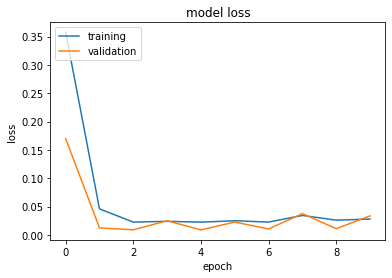

In [213]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [214]:
# performing predictions
predictions2 = model2.predict(X_test) 

# unscaling the predictions
predictions2 = scaler_y.inverse_transform(np.array(predictions2).reshape((len(predictions2), 1)))

# printing the predictions
print('Predictions:')
predictions2

Predictions:


array([[ 714.4984 ],
       [ 717.6297 ],
       [ 716.7207 ],
       [ 716.8867 ],
       [ 721.6986 ],
       [ 717.9296 ],
       [ 701.0671 ],
       [ 687.34283],
       [ 681.75476],
       [ 681.5892 ],
       [ 691.45715],
       [ 700.9835 ],
       [ 699.9477 ],
       [ 702.3269 ],
       [ 703.44476],
       [ 710.5406 ],
       [ 720.9692 ],
       [ 727.4398 ],
       [ 729.0291 ],
       [ 731.5442 ],
       [ 736.9185 ],
       [ 746.80963],
       [ 746.96893],
       [ 742.919  ],
       [ 741.18304],
       [ 749.3209 ],
       [ 755.47406],
       [ 758.1363 ],
       [ 756.53986],
       [ 755.19006],
       [ 751.16327],
       [ 746.645  ],
       [ 744.1757 ],
       [ 741.1076 ],
       [ 765.944  ],
       [ 773.29193],
       [ 773.85895],
       [ 777.4905 ],
       [ 778.597  ],
       [ 772.96454],
       [ 751.6839 ],
       [ 746.0169 ],
       [ 749.33966],
       [ 759.06775],
       [ 766.5303 ],
       [ 795.5667 ],
       [ 800.5799 ],
       [ 803.

# GENERAL TWEETS DATA

In [215]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/Reddit/GENERAL_FINBERT_Reddit_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)
stock_data = stock_data[(stock_data['Date'] >= '2018-07-27')]
# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2018-07-27,59.436001,0.218219,0.233520,0.548260,61.450001,61.537998,59.068001,28516500
2018-07-30,58.034000,0.218219,0.233520,0.548260,59.180000,59.220001,57.226002,34070500
2018-07-31,59.627998,0.081450,0.200449,0.718102,58.450001,59.664001,57.813999,25384500
2018-08-01,60.167999,0.081450,0.200449,0.718102,59.598000,60.599998,58.599998,50647000
2018-08-02,69.907997,0.081450,0.200449,0.718102,65.688004,69.998001,64.632004,116075000
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,0.170854,0.096515,0.732631,860.770020,906.359985,848.030029,25260500
2022-05-03,909.250000,0.170854,0.096515,0.732631,903.179993,924.080017,888.590027,21236500
2022-05-04,952.619995,NaN,NaN,NaN,903.940002,955.500000,885.280029,27214600


In [216]:
stock_data.shape

(952, 8)

In [217]:
stock_data.isna().sum()

Close        0
negative    98
neutral     98
positive    98
Open         0
High         0
Low          0
Volume       0
dtype: int64

In [218]:
stock_data['negative'] = stock_data['negative'].interpolate(option='spline')
stock_data['positive'] = stock_data['positive'].interpolate(option='spline')
stock_data['neutral'] = stock_data['neutral'].interpolate(option='spline')
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2018-07-27,59.436001,0.218219,0.233520,0.548260,61.450001,61.537998,59.068001,28516500
2018-07-30,58.034000,0.218219,0.233520,0.548260,59.180000,59.220001,57.226002,34070500
2018-07-31,59.627998,0.081450,0.200449,0.718102,58.450001,59.664001,57.813999,25384500
2018-08-01,60.167999,0.081450,0.200449,0.718102,59.598000,60.599998,58.599998,50647000
2018-08-02,69.907997,0.081450,0.200449,0.718102,65.688004,69.998001,64.632004,116075000
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,0.170854,0.096515,0.732631,860.770020,906.359985,848.030029,25260500
2022-05-03,909.250000,0.170854,0.096515,0.732631,903.179993,924.080017,888.590027,21236500
2022-05-04,952.619995,0.170854,0.096515,0.732631,903.940002,955.500000,885.280029,27214600


In [219]:
stock_data.isna().sum()

Close       0
negative    0
neutral     0
positive    0
Open        0
High        0
Low         0
Volume      0
dtype: int64

In [220]:
stock_data = stock_data.dropna()

In [221]:
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2018-07-27,59.436001,0.218219,0.233520,0.548260,61.450001,61.537998,59.068001,28516500
2018-07-30,58.034000,0.218219,0.233520,0.548260,59.180000,59.220001,57.226002,34070500
2018-07-31,59.627998,0.081450,0.200449,0.718102,58.450001,59.664001,57.813999,25384500
2018-08-01,60.167999,0.081450,0.200449,0.718102,59.598000,60.599998,58.599998,50647000
2018-08-02,69.907997,0.081450,0.200449,0.718102,65.688004,69.998001,64.632004,116075000
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,0.170854,0.096515,0.732631,860.770020,906.359985,848.030029,25260500
2022-05-03,909.250000,0.170854,0.096515,0.732631,903.179993,924.080017,888.590027,21236500
2022-05-04,952.619995,0.170854,0.096515,0.732631,903.940002,955.500000,885.280029,27214600


In [222]:
stock_data.describe(include='all')

,Close,negative,neutral,positive,Open,High,Low,Volume
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02
mean,391.771953,0.153705,0.148832,0.697463,391.815963,400.847062,381.974996,4.736848e+07
std,358.566745,0.067045,0.090236,0.092347,358.984147,367.100211,349.749412,3.268678e+07
min,35.793999,0.034079,0.011817,0.024016,36.220001,37.335999,35.397999,9.800600e+06
25%,62.536501,0.113292,0.089361,0.652114,62.559502,63.628500,60.730000,2.561765e+07
50%,197.687996,0.148698,0.127228,0.711338,198.208000,201.388000,191.725998,3.628290e+07
75%,701.852493,0.183854,0.188819,0.748257,701.130005,715.189987,684.775009,5.895762e+07
max,1229.910034,0.888440,0.662958,0.917034,1234.410034,1243.489990,1217.000000,3.046940e+08


In [223]:
stock_data= stock_data.astype({"Volume":'float'})

In [224]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 2018-07-27 to 2022-05-06
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     952 non-null    float64
 1   negative  952 non-null    float64
 2   neutral   952 non-null    float64
 3   positive  952 non-null    float64
 4   Open      952 non-null    float64
 5   High      952 non-null    float64
 6   Low       952 non-null    float64
 7   Volume    952 non-null    float64
dtypes: float64(8)
memory usage: 66.9+ KB


In [225]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 760
Number of records in Test Data: 192


In [226]:
stock_data['Close_EWMA3'] = stock_data['Close'].ewm(span=3, adjust=False).mean()
stock_data['Close_EWMA7'] = stock_data['Close'].ewm(span=7, adjust=False).mean()
stock_data['Close_EWMA14'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data['Close_EWMA30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data['pos_EWMA3'] = stock_data['positive'].ewm(span=3, adjust=False).mean()
stock_data['pos_EWMA7'] = stock_data['positive'].ewm(span=7, adjust=False).mean()
stock_data['pos_EWMA14'] = stock_data['positive'].ewm(span=14, adjust=False).mean()
stock_data['pos_EWMA30'] = stock_data['positive'].ewm(span=30, adjust=False).mean()

stock_data['neu_EWMA3'] = stock_data['neutral'].ewm(span=3, adjust=False).mean()
stock_data['neu_EWMA7'] = stock_data['neutral'].ewm(span=7, adjust=False).mean()
stock_data['neu_EWMA14'] = stock_data['neutral'].ewm(span=14, adjust=False).mean()
stock_data['neu_EWMA30'] = stock_data['neutral'].ewm(span=30, adjust=False).mean()

stock_data['neg_EWMA3'] = stock_data['negative'].ewm(span=3, adjust=False).mean()
stock_data['neg_EWMA7'] = stock_data['negative'].ewm(span=7, adjust=False).mean()
stock_data['neg_EWMA14'] = stock_data['negative'].ewm(span=14, adjust=False).mean()
stock_data['neg_EWMA30'] = stock_data['negative'].ewm(span=30, adjust=False).mean()


# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

negative = stock_data.iloc[start:total_data,1] #neg
neutral = stock_data.iloc[start:total_data,2] #neu
positive = stock_data.iloc[start:total_data,3] #pos
open_price = stock_data.iloc[start:total_data,4] #open
high = stock_data.iloc[start:total_data,5] #high
low = stock_data.iloc[start:total_data,6] #low
volume = stock_data.iloc[start:total_data,7] #volume

ewma3_close = stock_data.iloc[start:total_data,8]#exponentially moving average 3days
ewma7_close = stock_data.iloc[start:total_data,9]#exponentially moving average 7days
ewma14_close = stock_data.iloc[start:total_data,10]#exponentially moving average 14days
ewma30_close = stock_data.iloc[start:total_data,11]#exponentially moving average 30days

ewma3_pos = stock_data.iloc[start:total_data,12]#exponentially moving average 3days
ewma7_pos = stock_data.iloc[start:total_data,13]#exponentially moving average 7days
ewma14_pos = stock_data.iloc[start:total_data,14]#exponentially moving average 14days
ewma30_pos = stock_data.iloc[start:total_data,15]#exponentially moving average 30days

ewma3_neu = stock_data.iloc[start:total_data,16]#exponentially moving average 3days
ewma7_neu = stock_data.iloc[start:total_data,17]#exponentially moving average 7days
ewma14_neu = stock_data.iloc[start:total_data,18]#exponentially moving average 14days
ewma30_neu = stock_data.iloc[start:total_data,19]#exponentially moving average 30days

ewma3_neg = stock_data.iloc[start:total_data,20]#exponentially moving average 3days
ewma7_neg = stock_data.iloc[start:total_data,21]#exponentially moving average 7days
ewma14_neg = stock_data.iloc[start:total_data,22]#exponentially moving average 14days
ewma30_neg = stock_data.iloc[start:total_data,23]#exponentially moving average 30days

In [227]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2018-07-30     58.034000
2018-07-31     59.627998
2018-08-01     60.167999
2018-08-02     69.907997
2018-08-03     69.634003
                 ...    
2022-05-02    902.940002
2022-05-03    909.250000
2022-05-04    952.619995
2022-05-05    873.280029
2022-05-06    865.650024
Name: Close, Length: 951, dtype: float64

In [228]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price,
                  ewma3_close,
                  ewma7_close,
                  ewma14_close,
                  ewma30_close, 
                  close_price_shifted, 

                  positive,
                  ewma3_pos,
                  ewma7_pos,
                  ewma14_pos,
                  ewma30_pos, 

                  negative,
                  ewma3_neg,
                  ewma7_neg,
                  ewma14_neg,
                  ewma30_neg,

                  neutral,
                  ewma3_neu,
                  ewma7_neu,
                  ewma14_neu,
                  ewma30_neu, 

                  volume, 
                  open_price, 
                  high, 
                  low], 
                 axis=1)
data.columns = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-30,58.034000,58.735001,59.085501,59.249067,59.345549,59.627998,0.548260,0.548260,0.548260,0.548260,...,0.218219,0.233520,0.233520,0.233520,0.233520,0.233520,34070500.0,59.180000,59.220001,57.226002
2018-07-31,59.627998,59.181499,59.221125,59.299592,59.363772,60.167999,0.718102,0.633181,0.590721,0.570906,...,0.209396,0.200449,0.216985,0.225252,0.229111,0.231387,25384500.0,58.450001,59.664001,57.813999
2018-08-01,60.167999,59.674749,59.457844,59.415379,59.415657,69.907997,0.718102,0.675641,0.622566,0.590532,...,0.201141,0.200449,0.208717,0.219052,0.225289,0.229391,50647000.0,59.598000,60.599998,58.599998
2018-08-02,69.907997,64.791373,62.070382,60.814395,60.092583,69.634003,0.718102,0.696871,0.646450,0.607541,...,0.193419,0.200449,0.204583,0.214401,0.221977,0.227523,116075000.0,65.688004,69.998001,64.632004
2018-08-03,69.634003,67.212688,63.961287,61.990343,60.708158,68.398003,0.735198,0.716035,0.668637,0.624562,...,0.195376,0.041051,0.122817,0.171063,0.197854,0.215493,68282500.0,69.561996,71.000000,68.505997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.732631,0.732639,0.733287,0.735534,...,0.162569,0.096515,0.096522,0.097099,0.099163,0.101342,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.732631,0.732635,0.733123,0.735147,...,0.163103,0.096515,0.096519,0.096953,0.098810,0.101031,21236500.0,903.179993,924.080017,888.590027
2022-05-04,952.619995,926.774510,922.223103,941.692339,957.781968,873.280029,0.732631,0.732633,0.733000,0.734811,...,0.163603,0.096515,0.096517,0.096844,0.098504,0.100740,27214600.0,903.940002,955.500000,885.280029


In [229]:
data = data.dropna()    
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-30,58.034000,58.735001,59.085501,59.249067,59.345549,59.627998,0.548260,0.548260,0.548260,0.548260,...,0.218219,0.233520,0.233520,0.233520,0.233520,0.233520,34070500.0,59.180000,59.220001,57.226002
2018-07-31,59.627998,59.181499,59.221125,59.299592,59.363772,60.167999,0.718102,0.633181,0.590721,0.570906,...,0.209396,0.200449,0.216985,0.225252,0.229111,0.231387,25384500.0,58.450001,59.664001,57.813999
2018-08-01,60.167999,59.674749,59.457844,59.415379,59.415657,69.907997,0.718102,0.675641,0.622566,0.590532,...,0.201141,0.200449,0.208717,0.219052,0.225289,0.229391,50647000.0,59.598000,60.599998,58.599998
2018-08-02,69.907997,64.791373,62.070382,60.814395,60.092583,69.634003,0.718102,0.696871,0.646450,0.607541,...,0.193419,0.200449,0.204583,0.214401,0.221977,0.227523,116075000.0,65.688004,69.998001,64.632004
2018-08-03,69.634003,67.212688,63.961287,61.990343,60.708158,68.398003,0.735198,0.716035,0.668637,0.624562,...,0.195376,0.041051,0.122817,0.171063,0.197854,0.215493,68282500.0,69.561996,71.000000,68.505997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,870.760010,882.276100,916.403654,951.174978,965.548829,902.940002,0.732631,0.732646,0.733506,0.735980,...,0.161998,0.096515,0.096529,0.097294,0.099571,0.101675,29377700.0,902.250000,934.400024,870.000000
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.732631,0.732639,0.733287,0.735534,...,0.162569,0.096515,0.096522,0.097099,0.099163,0.101342,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.732631,0.732635,0.733123,0.735147,...,0.163103,0.096515,0.096519,0.096953,0.098810,0.101031,21236500.0,903.179993,924.080017,888.590027


In [230]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2018-07-30     59.627998
2018-07-31     60.167999
2018-08-01     69.907997
2018-08-02     69.634003
2018-08-03     68.398003
                 ...    
2022-04-29    902.940002
2022-05-02    909.250000
2022-05-03    952.619995
2022-05-04    873.280029
2022-05-05    865.650024
Name: close_price_shifted, Length: 950, dtype: float64

In [231]:
y[:760]

Date
2018-07-30     59.627998
2018-07-31     60.167999
2018-08-01     69.907997
2018-08-02     69.634003
2018-08-03     68.398003
                 ...    
2021-07-29    687.200012
2021-07-30    709.669983
2021-08-02    709.739990
2021-08-03    710.919983
2021-08-04    714.630005
Name: close_price_shifted, Length: 760, dtype: float64

In [232]:
y[760:]

Date
2021-08-05    699.099976
2021-08-06    713.760010
2021-08-09    709.989990
2021-08-10    707.820007
2021-08-11    722.250000
                 ...    
2022-04-29    902.940002
2022-05-02    909.250000
2022-05-03    952.619995
2022-05-04    873.280029
2022-05-05    865.650024
Name: close_price_shifted, Length: 190, dtype: float64

In [233]:
# setting the features dataset for prediction  
cols = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
x = data[cols]
x

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-30,58.034000,58.735001,59.085501,59.249067,59.345549,59.627998,0.548260,0.548260,0.548260,0.548260,...,0.218219,0.233520,0.233520,0.233520,0.233520,0.233520,34070500.0,59.180000,59.220001,57.226002
2018-07-31,59.627998,59.181499,59.221125,59.299592,59.363772,60.167999,0.718102,0.633181,0.590721,0.570906,...,0.209396,0.200449,0.216985,0.225252,0.229111,0.231387,25384500.0,58.450001,59.664001,57.813999
2018-08-01,60.167999,59.674749,59.457844,59.415379,59.415657,69.907997,0.718102,0.675641,0.622566,0.590532,...,0.201141,0.200449,0.208717,0.219052,0.225289,0.229391,50647000.0,59.598000,60.599998,58.599998
2018-08-02,69.907997,64.791373,62.070382,60.814395,60.092583,69.634003,0.718102,0.696871,0.646450,0.607541,...,0.193419,0.200449,0.204583,0.214401,0.221977,0.227523,116075000.0,65.688004,69.998001,64.632004
2018-08-03,69.634003,67.212688,63.961287,61.990343,60.708158,68.398003,0.735198,0.716035,0.668637,0.624562,...,0.195376,0.041051,0.122817,0.171063,0.197854,0.215493,68282500.0,69.561996,71.000000,68.505997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,870.760010,882.276100,916.403654,951.174978,965.548829,902.940002,0.732631,0.732646,0.733506,0.735980,...,0.161998,0.096515,0.096529,0.097294,0.099571,0.101675,29377700.0,902.250000,934.400024,870.000000
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.732631,0.732639,0.733287,0.735534,...,0.162569,0.096515,0.096522,0.097099,0.099163,0.101342,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.732631,0.732635,0.733123,0.735147,...,0.163103,0.096515,0.096519,0.096953,0.098810,0.101031,21236500.0,903.179993,924.080017,888.590027


In [234]:
from sklearn.preprocessing import StandardScaler
# scaling the feature dataset

scaler_x = preprocessing.StandardScaler ()
x = np.array(x).reshape((len(x) ,len(cols)))

# scaling the target variable
scaler_y = preprocessing.StandardScaler ()
y = np.array (y).reshape ((len( y), 1))

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 58.0340004 ,  58.73500061,  59.08550072, ...,  59.18000031,
          59.22000122,  57.22600174],
        [ 59.62799835,  59.18149948,  59.22112513, ...,  58.45000076,
          59.66400146,  57.81399918],
        [ 60.16799927,  59.67474937,  59.45784366, ...,  59.59799957,
          60.59999847,  58.59999847],
        ...,
        [909.25      , 900.92902549, 912.09080573, ..., 903.17999268,
         924.08001709, 888.59002686],
        [952.61999512, 926.7745103 , 922.22310307, ..., 903.94000244,
         955.5       , 885.2800293 ],
        [873.2800293 , 900.0272698 , 909.98733463, ..., 939.02001953,
         945.59997559, 857.70001221]]), array([[  59.62799835],
        [  60.16799927],
        [  69.90799713],
        [  69.63400269],
        [  68.39800262],
        [  75.91400146],
        [  74.06800079],
        [  70.48999786],
        [  71.09799957],
        [  71.28199768],
        [  69.52799988],
        [  67.73799896],
        [  67.08999634],
        [  61

In [235]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (760, 25) and y: (760, 1)
Number of rows and columns in the Test set X: (189, 25) and y: (189, 1)


In [236]:
sc = scaler_x.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

sc = scaler_y.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [237]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (760, 25, 1)
Shape of Test set X: (189, 25, 1)


# MODEL FOR GENERAL TWEETS

In [238]:
# setting the seed to achieve consistent and less random predictions at each execution
import tensorflow as tf
import random 
import os
# setting the seed to achieve consistent and less random predictions at each execution
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
initializer = tf.keras.initializers.GlorotNormal()
# setting the model architecture
model1=Sequential()
model1.add((GRU(250,return_sequences=True,activation='tanh',kernel_initializer=initializer,input_shape=(len(cols),1))))
model1.add(Dropout(0.4))
model1.add((GRU(200,return_sequences=True,activation='tanh')))
model1.add(Dropout(0.4))
model1.add((GRU(150,activation='tanh', return_sequences=True)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(1, activation = 'linear'))

# printing the model summary
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_21 (GRU)                (None, 25, 250)           189750    
                                                                 
 dropout_21 (Dropout)        (None, 25, 250)           0         
                                                                 
 gru_22 (GRU)                (None, 25, 200)           271200    
                                                                 
 dropout_22 (Dropout)        (None, 25, 200)           0         
                                                                 
 gru_23 (GRU)                (None, 25, 150)           158400    
                                                                 
 dropout_23 (Dropout)        (None, 25, 150)           0         
                                                                 
 flatten_7 (Flatten)         (None, 3750)             

In [239]:
import tensorflow as tf
model1.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, \
    restore_best_weights=True)]

history = model1.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/100
43/43 [==============================] - 14s 180ms/step - loss: 0.3865 - val_loss: 0.2067
Epoch 2/100
43/43 [==============================] - 7s 153ms/step - loss: 0.0424 - val_loss: 0.0105
Epoch 3/100
43/43 [==============================] - 6s 147ms/step - loss: 0.0243 - val_loss: 0.0072
Epoch 4/100
43/43 [==============================] - 7s 154ms/step - loss: 0.0205 - val_loss: 0.0195
Epoch 5/100
43/43 [==============================] - 7s 152ms/step - loss: 0.0218 - val_loss: 0.0124
Epoch 6/100
43/43 [==============================] - 7s 153ms/step - loss: 0.0197 - val_loss: 0.0111
Epoch 7/100
43/43 [==============================] - 7s 155ms/step - loss: 0.0194 - val_loss: 0.0075
Epoch 8/100
43/43 [==============================] - 7s 151ms/step - loss: 0.0215 - val_loss: 0.0199


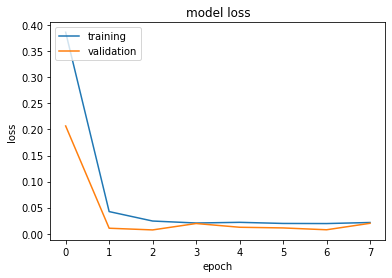

In [240]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [241]:
# performing predictions
predictions1 = model1.predict(X_test) 

# unscaling the predictions
predictions1 = scaler_y.inverse_transform(np.array(predictions1).reshape((len(predictions1), 1)))

# printing the predictions
print('Predictions:')
predictions1

Predictions:


array([[ 695.2879 ],
       [ 699.62634],
       [ 700.0047 ],
       [ 701.42035],
       [ 708.02924],
       [ 724.0877 ],
       [ 713.8161 ],
       [ 705.95874],
       [ 706.2534 ],
       [ 699.54486],
       [ 702.23804],
       [ 710.58624],
       [ 711.616  ],
       [ 711.6472 ],
       [ 710.3984 ],
       [ 715.11456],
       [ 716.1078 ],
       [ 720.8941 ],
       [ 720.5588 ],
       [ 721.6695 ],
       [ 725.85913],
       [ 734.85565],
       [ 738.3661 ],
       [ 737.2103 ],
       [ 734.5209 ],
       [ 747.02344],
       [ 748.1808 ],
       [ 750.96875],
       [ 752.4176 ],
       [ 754.226  ],
       [ 745.18005],
       [ 744.99347],
       [ 750.8087 ],
       [ 753.5119 ],
       [ 763.8389 ],
       [ 771.9525 ],
       [ 770.5028 ],
       [ 769.9883 ],
       [ 768.08575],
       [ 768.03955],
       [ 774.059  ],
       [ 770.9425 ],
       [ 761.61584],
       [ 766.6527 ],
       [ 766.71533],
       [ 770.522  ],
       [ 779.45856],
       [ 782.

# Unscaling

In [242]:
# unscaling the test feature dataset, x_test
# unscaling the test y dataset, y_test+
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

# Comparision

###  Plotting

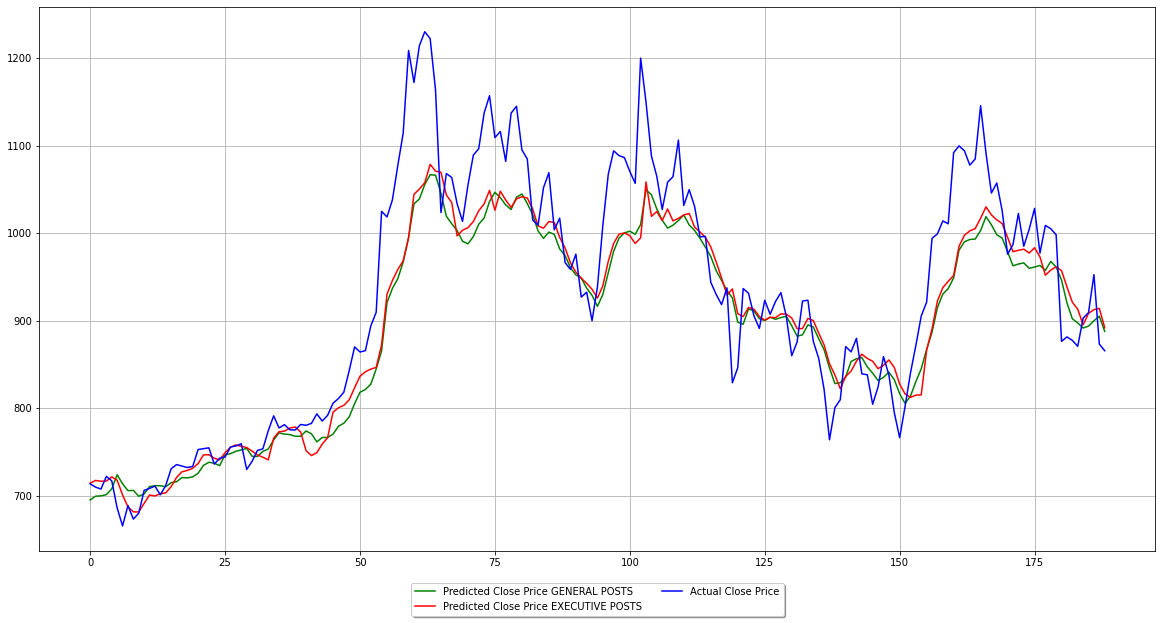

In [243]:

plt.figure(figsize=(20,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions1,'-g', label="Predicted Close Price GENERAL POSTS")
plt.plot(predictions2,'-r', label="Predicted Close Price EXECUTIVE POSTS")
plt.plot([row[0] for row in y_test],color = 'b', label="Actual Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.grid()
plt.show()


### Mean Absolute Error

In [244]:
from sklearn.metrics import mean_absolute_error

print("MAE general",mean_absolute_error(y_test,predictions1))
print("MAE executive",mean_absolute_error(y_test,predictions2))

MAE general 44.62550216755539
MAE executive 42.28372337704614


### MSE and RMSE SCORE

In [245]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE1 = np.square(np.subtract(y_test,predictions1)).mean() 
MSE2 = np.square(np.subtract(y_test,predictions2)).mean() 

print("MSE general",MSE1)
print("MSE executive",MSE2)

RMSE1 = MSE1
RMSE2 = MSE2

print('Root Mean Square Error General Tweets (sklearn.metrics) =', round(np.sqrt(RMSE1),4))
print('Root Mean Square Error Executive Tweets (sklearn.metrics) =', round(np.sqrt(RMSE2),4))

MSE general 3770.3519758868115
MSE executive 3480.3860311725193
Root Mean Square Error General Tweets (sklearn.metrics) = 61.4032
Root Mean Square Error Executive Tweets (sklearn.metrics) = 58.9948


### R2

In [246]:
from sklearn.metrics import r2_score
r2 =[ r2_score(y_test,predictions1), r2_score(y_test,predictions2)]
print('R2 general',r2[0])
print('R2 executive',r2[1])

R2 general 0.8118186114101053
R2 executive 0.826291051773523


### MAPE

In [247]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
    
print("MAPE General",MAPE(y_test,predictions1), "%")
print("MAPE Executive",MAPE(y_test,predictions2), "%")

MAPE General 4.48113361968709 %
MAPE Executive 4.247141750412483 %


### Conclusion
 General Tweets can affect the stock market better than Executive Tweets

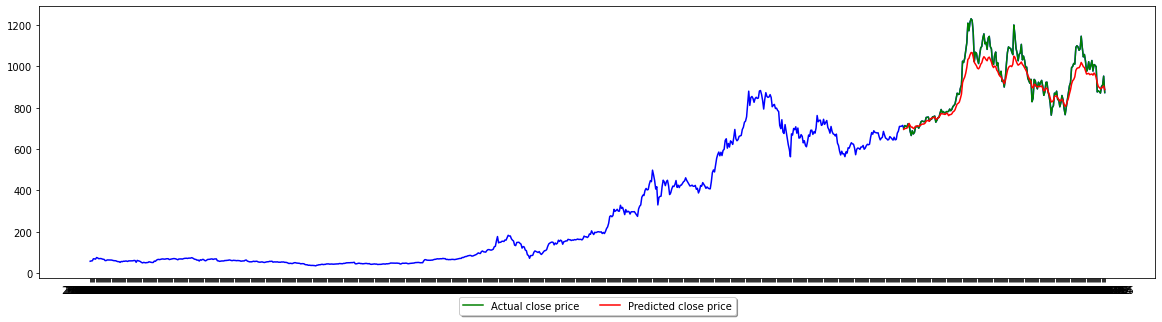

In [248]:
val = data[len(y_train)+1:]
val['pred'] = predictions1
plt.figure(figsize = (20,5))
plt.plot(data['close_price'], color = 'b')
plt.plot(val['close_price'], label = 'Actual close price', color = 'g')
plt.plot(val['pred'], label = 'Predicted close price', color = 'r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()